0it [00:00, ?it/s]

500000it [00:01, 468017.97it/s]


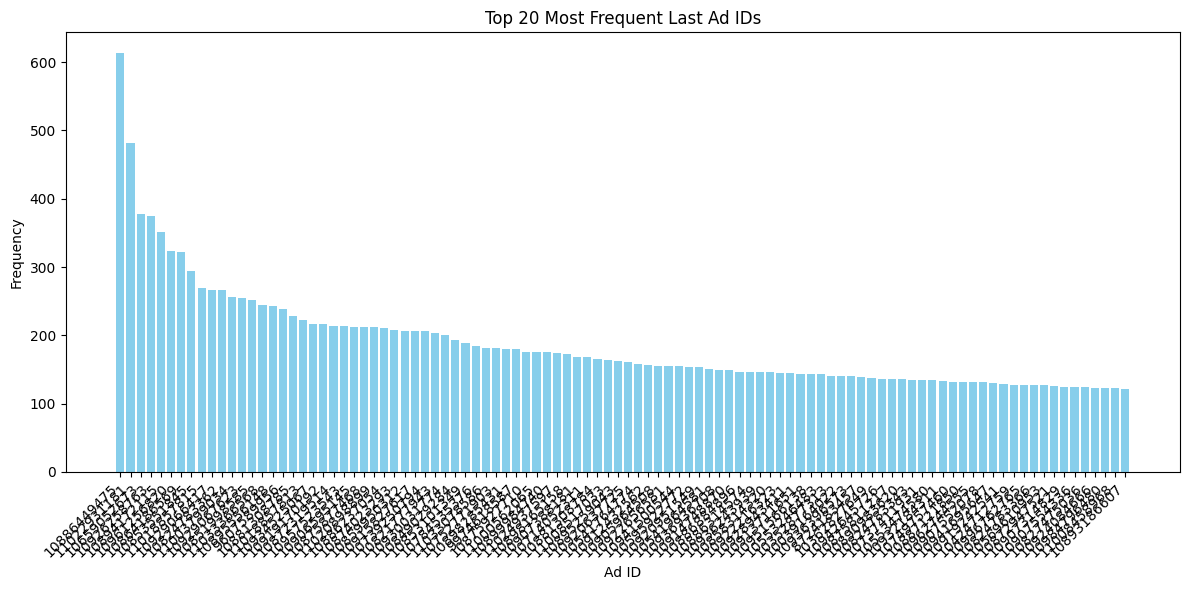

In [1]:
from tqdm import tqdm

ad_path = "./data/ad_data"
sequence_path = "./data/sequence_data"

filelengths = []
last_ad_ids = {}

with open(sequence_path, 'r') as f:
    for line in tqdm(f):
        user_id, ad_seq = line.strip().split('\t')
        ad_ids = ad_seq.strip().split()
        
        last_ad_id = ad_ids[-1]
        
        if last_ad_id not in last_ad_ids:
            last_ad_ids[last_ad_id] = 0
        last_ad_ids[last_ad_id] += 1
        
last_ad_ids = sorted(last_ad_ids.items(), key=lambda x: x[1], reverse=True)

import matplotlib.pyplot as plt

# Extract the top 20 most frequent last ad IDs for visualization
top_last_ad_ids = last_ad_ids[:100]
ad_ids, counts = zip(*top_last_ad_ids)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(ad_ids, counts, color='skyblue')
plt.xlabel('Ad ID')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Last Ad IDs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
